In [8]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [19]:
df = pandas.read_csv("iris.csv", header=None)
dataset = df.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [27]:
le = LabelEncoder()
encoded_Y = le.fit_transform(Y)
dummy_y = to_categorical(encoded_Y)
encoded_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [47]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [55]:
history = model.fit(X, dummy_y, epochs=75, batch_size=10, validation_split=0.1)

Epoch 1/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9296 - loss: 0.1095 - val_accuracy: 0.8667 - val_loss: 0.1827
Epoch 2/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9557 - loss: 0.0875 - val_accuracy: 0.9333 - val_loss: 0.1429
Epoch 3/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9675 - loss: 0.1087 - val_accuracy: 0.9333 - val_loss: 0.1619
Epoch 4/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.1094 - val_accuracy: 0.9333 - val_loss: 0.1509
Epoch 5/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9851 - loss: 0.0542 - val_accuracy: 0.9333 - val_loss: 0.1521
Epoch 6/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.0541 - val_accuracy: 0.9333 - val_loss: 0.1416
Epoch 7/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9570 - loss: 0.0845 - val_accuracy: 0.8667 - val_loss: 0.1887
Epoch 8/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.0619 - val_accuracy: 0.9333 - val_loss:

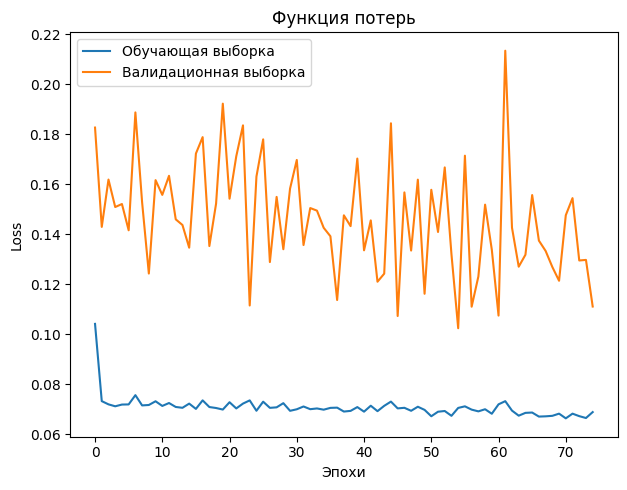

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Валидационная выборка')
plt.title('Функция потерь')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

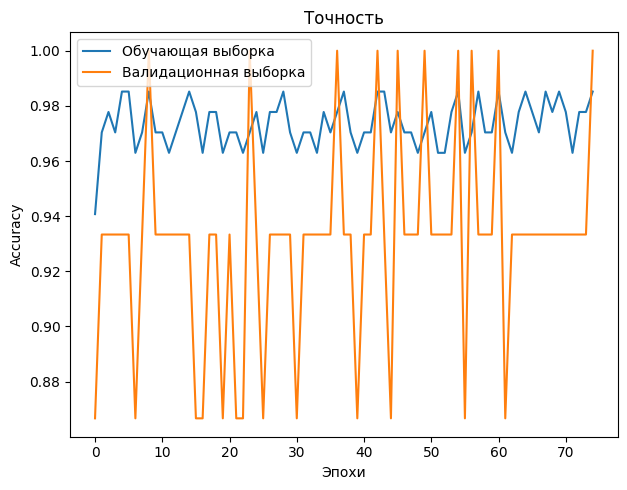

In [59]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Валидационная выборка')
plt.title('Точность')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()